In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# for benchmarks

# on 18000 frame episodes, average of 10 episodes
soloRandomScores = {
     'Alien-v0': 164.0,'Asteroids-v0': 815.0,'Atlantis-v0': 21100.0,'BankHeist-v0': 17.0,
     'BattleZone-v0': 3300.0,'Bowling-v0': 20.2,'Boxing-v0': 2.4,'Centipede-v0': 2229.7,
     'ChopperCommand-v0': 660.0,'DoubleDunk-v0': -19.2,'FishingDerby-v0': -92.2,
     'Freeway-v0': 0.0,'Frostbite-v0': 53.0,'Gravitar-v0': 310.0,'Hero-v0': 1217.5,
     'IceHockey-v0': -10.9,'Jamesbond-v0': 25.0,'Kangaroo-v0': 60.0,'Krull-v0': 1479.8,
     'KungFuMaster-v0': 760.0,'MsPacman-v0': 246.0,'PrivateEye-v0': 40.0,
     'RoadRunner-v0': 20.0, 'Skiing-v0': -16270.7, 'Tennis-v0': -24.0,'TimePilot-v0': 3190.0,
     'UpNDown-v0': 422.0,'Venture-v0': 0.0,'WizardOfWor-v0': 750.0,'Zaxxon-v0': 0.0}

soloTpgScores = {
     'Alien-v0': 3382.7,'Asteroids-v0': 3050.7,'Atlantis-v0': 89653,'BankHeist-v0': 1051,
     'BattleZone-v0': 47233.4,'Bowling-v0': 223.7,'Boxing-v0': 76.5,'Centipede-v0': 34731.7,
     'ChopperCommand-v0': 7070,'DoubleDunk-v0': 2,'FishingDerby-v0': 49,
     'Freeway-v0': 28.9,'Frostbite-v0': 8144.4,'Gravitar-v0': 786.7,'Hero-v0': 16545.4,
     'IceHockey-v0': 10,'Jamesbond-v0': 3120,'Kangaroo-v0': 14780,'Krull-v0': 12850.4,
     'KungFuMaster-v0': 43353.4,'MsPacman-v0': 5156,'PrivateEye-v0': 15028.3,
     'RoadRunner-v0': 17410, 'Skiing-v0': 0, 'Tennis-v0': 1,'TimePilot-v0': 13540,
     'RoadRunner-v0': 17410,'Tennis-v0': 0,'TimePilot-v0': 13540,
     'UpNDown-v0': 34416,'Venture-v0': 576.7,'WizardOfWor-v0': 5196.7,'Zaxxon-v0': 6233.4}

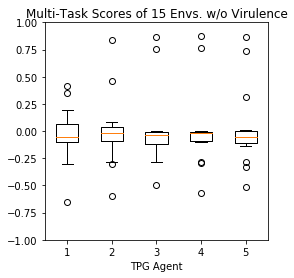

In [34]:
df = pd.read_csv('15-shrink-novir.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==300]

df.head()

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(4,19):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())


plt.figure(figsize=(4,4))
plt.boxplot(scoreDists)
plt.ylim(-1,1)
plt.title('Multi-Task Scores of 15 Envs. w/o Virulence')
plt.xlabel('TPG Agent')
#plt.ylabel('Score')
plt.show()

In [35]:
agentsScores = []
for i in range(len(df)):
    print('Agent #' + str(i+1) + ':')
    agentsScores.append([])
    for j in range(4,19):
        agentsScores[-1].append((str(df.columns[j][5:]), 
                (df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
                (soloTpgScores[df.columns[j][5:]] - soloRandomScores[df.columns[j][5:]])))
        print(agentsScores[-1][-1][0] + ': ' + str(df.iloc[i,j]) + ' : ' + str(agentsScores[-1][-1][1]))
        
    print('\nSorted:')
    agentsScores[-1].sort(key=lambda x: x[1], reverse=True)
    for score in agentsScores[-1]:
        print(score[0] + ': ' + str(score[1]))
    print('\n')
    
for scores in agentsScores:
    print(sum([score[1] for score in scores])/len(scores))

Agent #1:
Alien-v0: 3.333333333333333 : -0.049916633009185904
Asteroids-v0: 145.33333333333334 : -0.29953333035141866
Atlantis-v0: 1500.0 : -0.2859101716919756
BankHeist-v0: 5.666666666666668 : -0.01096067053513862
BattleZone-v0: 11900.0 : 0.1957508410457647
Bowling-v0: 0.0 : -0.09926289926289926
Boxing-v0: -1.7333333333333334 : -0.05578047683310841
Centipede-v0: 6040.966666666666 : 0.11726252743420919
ChopperCommand-v0: 6.666666666666668 : -0.10192407696307854
DoubleDunk-v0: -11.733333333333333 : 0.35220125786163525
FishingDerby-v0: -97.73333333333332 : -0.03918791312559007
Freeway-v0: 12.066666666666665 : 0.41753171856978083
Frostbite-v0: 165.33333333333334 : 0.0138830527885574
Gravitar-v0: 0.0 : -0.6503041745332494
Hero-v0: 132.5 : -0.07078595241357263

Sorted:
Freeway-v0: 0.41753171856978083
DoubleDunk-v0: 0.35220125786163525
BattleZone-v0: 0.1957508410457647
Centipede-v0: 0.11726252743420919
Frostbite-v0: 0.0138830527885574
BankHeist-v0: -0.01096067053513862
FishingDerby-v0: -0.03

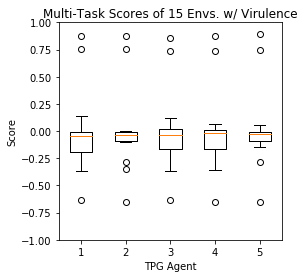

In [39]:
df = pd.read_csv('15-shrink-vir.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==300]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(4,19):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.figure(figsize=(4,4))
plt.boxplot(scoreDists)
plt.ylim(-1,1)
plt.title('Multi-Task Scores of 15 Envs. w/ Virulence')
plt.xlabel('TPG Agent')
plt.ylabel('Score')
plt.show()

In [40]:
agentsScores = []
for i in range(len(df)):
    print('Agent #' + str(i+1) + ':')
    agentsScores.append([])
    for j in range(4,19):
        agentsScores[-1].append((str(df.columns[j][5:]), 
                (df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
                (soloTpgScores[df.columns[j][5:]] - soloRandomScores[df.columns[j][5:]])))
        print(agentsScores[-1][-1][0] + ': ' + str(df.iloc[i,j]) + ' : ' + str(agentsScores[-1][-1][1]))
        
    print('\nSorted:')
    agentsScores[-1].sort(key=lambda x: x[1], reverse=True)
    for score in agentsScores[-1]:
        print(score[0] + ': ' + str(score[1]))
    print('\n')
    
for scores in agentsScores:
    print(sum([score[1] for score in scores])/len(scores))

Agent #1:
Alien-v0: 3.0 : -0.05002019448845808
Asteroids-v0: 149.33333333333334 : -0.2977441815389662
Atlantis-v0: 1540.0 : -0.2853266815456654
BankHeist-v0: 0.3333333333333333 : -0.016118633139909737
BattleZone-v0: 2333.333333333333 : -0.022003001512896043
Bowling-v0: 0.06666666666666668 : -0.09893529893529893
Boxing-v0: -25.13333333333333 : -0.3715699505173189
Centipede-v0: 6837.966666666666 : 0.14178409533772282
ChopperCommand-v0: 500.0 : -0.0249609984399376
DoubleDunk-v0: -0.6666666666666666 : 0.8742138364779873
FishingDerby-v0: -99.0 : -0.04815864022662888
Freeway-v0: 21.86666666666667 : 0.7566320645905423
Frostbite-v0: 0.0 : -0.0065501643720493365
Gravitar-v0: 8.333333333333334 : -0.6328228795189147
Hero-v0: 0.0 : -0.0794303198742163

Sorted:
DoubleDunk-v0: 0.8742138364779873
Freeway-v0: 0.7566320645905423
Centipede-v0: 0.14178409533772282
Frostbite-v0: -0.0065501643720493365
BankHeist-v0: -0.016118633139909737
BattleZone-v0: -0.022003001512896043
ChopperCommand-v0: -0.0249609984

In [14]:
dfv = pd.read_csv('15-shrink-vir.txt')
dfv = dfv[dfv.tpgGen==120]

df = pd.read_csv('15-shrink-novir.txt')
df = df[df.tpgGen==120]

distVir = []
distNovir = []

for i in range(len(dfv)):
    for j in range(4,19):
        distVir.append((dfv.iloc[i,j] - soloRandomScores[dfv.columns[j][5:]]) /
                (soloTpgScores[dfv.columns[j][5:]] - soloRandomScores[dfv.columns[j][5:]]))
        distNovir.append((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
                (soloTpgScores[df.columns[j][5:]] - soloRandomScores[df.columns[j][5:]]))
        
print(stats.ks_2samp(distVir, distNovir))

Ks_2sampResult(statistic=0.07999999999999999, pvalue=0.9633440870813367)


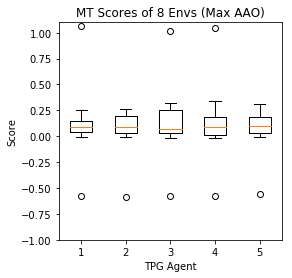

In [36]:
df = pd.read_csv('8-all-at-once.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==150]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(3,11):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.figure(figsize=(4,4))
plt.boxplot(scoreDists)
plt.ylim(-1,1.1)
plt.title('MT Scores of 8 Envs (Max AAO)')
plt.xlabel('TPG Agent')
plt.ylabel('Score')
plt.show()

In [23]:
agentsScores = []
for i in range(len(df)):
    print('Agent #' + str(i+1) + ':')
    agentsScores.append([])
    for j in range(3,11):
        agentsScores[-1].append((str(df.columns[j][5:]), 
                (df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
                (soloTpgScores[df.columns[j][5:]] - soloRandomScores[df.columns[j][5:]])))
        print(agentsScores[-1][-1][0] + ': ' + str(agentsScores[-1][-1][1]))
        
    print('\nSorted:')
    agentsScores[-1].sort(key=lambda x: x[1], reverse=True)
    for score in agentsScores[-1]:
        print(score[0] + ': ' + str(score[1]))
    print('\n')

Agent #1:
Alien-v0: -0.008077795383229254
Asteroids-v0: 1.0663326922216756
Atlantis-v0: 0.08300147331261944
BankHeist-v0: 0.06286266924564797
BattleZone-v0: 0.09787542052288235
Bowling-v0: 0.25307125307125306
Boxing-v0: -0.5802968960863698
Centipede-v0: 0.10664574487723832

Sorted:
Asteroids-v0: 1.0663326922216756
Bowling-v0: 0.25307125307125306
Centipede-v0: 0.10664574487723832
BattleZone-v0: 0.09787542052288235
Atlantis-v0: 0.08300147331261944
BankHeist-v0: 0.06286266924564797
Alien-v0: -0.008077795383229254
Boxing-v0: -0.5802968960863698


Agent #2:
Alien-v0: -0.0074564265075962345
Asteroids-v0: 1.1490808247976025
Atlantis-v0: 0.04507461380245941
BankHeist-v0: 0.061895551257253385
BattleZone-v0: 0.17071294277246923
Bowling-v0: 0.25896805896805897
Boxing-v0: -0.5883940620782727
Centipede-v0: 0.11482985662420775

Sorted:
Asteroids-v0: 1.1490808247976025
Bowling-v0: 0.25896805896805897
BattleZone-v0: 0.17071294277246923
Centipede-v0: 0.11482985662420775
BankHeist-v0: 0.0618955512572533

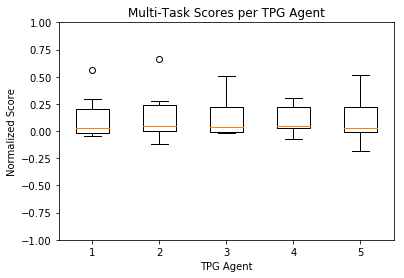

In [20]:
df = pd.read_csv('8-all-at-once-window-2.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==150]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(3,11):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.ylim(-1,1)
plt.title('Multi-Task Scores per TPG Agent')
plt.xlabel('TPG Agent')
plt.ylabel('Normalized Score')
plt.show()

In [21]:
agentsScores = []
for i in range(len(df)):
    print('Agent #' + str(i+1) + ':')
    agentsScores.append([])
    for j in range(3,11):
        agentsScores[-1].append((str(df.columns[j][5:]), 
                (df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
                (soloTpgScores[df.columns[j][5:]] - soloRandomScores[df.columns[j][5:]])))
        print(agentsScores[-1][-1][0] + ': ' + str(agentsScores[-1][-1][1]))
        
    print('\nSorted:')
    agentsScores[-1].sort(key=lambda x: x[1], reverse=True)
    for score in agentsScores[-1]:
        print(score[0] + ': ' + str(score[1]))
    print('\n')

Agent #1:
Alien-v0: 0.0288936527169
Asteroids-v0: 0.559556291095
Atlantis-v0: -0.0439076335098
BankHeist-v0: -0.00773694390716
BattleZone-v0: 0.0273140708436
Bowling-v0: 0.296805896806
Boxing-v0: -0.0350877192982
Centipede-v0: 0.166045166451

Sorted:
Asteroids-v0: 0.559556291095
Bowling-v0: 0.296805896806
Centipede-v0: 0.166045166451
Alien-v0: 0.0288936527169
BattleZone-v0: 0.0273140708436
BankHeist-v0: -0.00773694390716
Boxing-v0: -0.0350877192982
Atlantis-v0: -0.0439076335098


Agent #2:
Alien-v0: 0.0282722838413
Asteroids-v0: 0.665563358232
Atlantis-v0: -0.117573264481
BankHeist-v0: 0.00773694390716
BattleZone-v0: 0.0591804868278
Bowling-v0: 0.276658476658
Boxing-v0: -0.0337381916329
Centipede-v0: 0.233696387915

Sorted:
Asteroids-v0: 0.665563358232
Bowling-v0: 0.276658476658
Centipede-v0: 0.233696387915
BattleZone-v0: 0.0591804868278
Alien-v0: 0.0282722838413
BankHeist-v0: 0.00773694390716
Boxing-v0: -0.0337381916329
Atlantis-v0: -0.117573264481


Agent #3:
Alien-v0: 0.032621865970

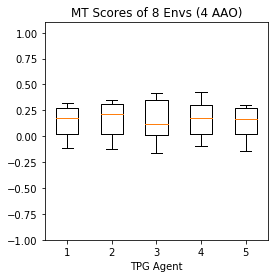

In [40]:
df = pd.read_csv('8-all-at-once-window-4.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==150]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(3,11):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())

plt.figure(figsize=(4,4))
plt.boxplot(scoreDists)
plt.ylim(-1,1.1)
plt.title('MT Scores of 8 Envs (4 AAO)')
plt.xlabel('TPG Agent')
#plt.ylabel('Score')
plt.show()

In [41]:
agentsScores = []
for i in range(len(df)):
    print('Agent #' + str(i+1) + ':')
    agentsScores.append([])
    for j in range(3,11):
        agentsScores[-1].append((str(df.columns[j][5:]), 
                (df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
                (soloTpgScores[df.columns[j][5:]] - soloRandomScores[df.columns[j][5:]])))
        print(agentsScores[-1][-1][0] + ': ' + str(agentsScores[-1][-1][1]))
        
    print('\nSorted:')
    agentsScores[-1].sort(key=lambda x: x[1], reverse=True)
    for score in agentsScores[-1]:
        print(score[0] + ': ' + str(score[1]))
    print('\n')

Agent #1:
Alien-v0: 0.024854755025320783
Asteroids-v0: 0.3211522118352194
Atlantis-v0: 0.2561521742301577
BankHeist-v0: 0.012572533849129593
BattleZone-v0: 0.2685883632953516
Bowling-v0: 0.3036855036855037
Boxing-v0: -0.11336032388663969
Centipede-v0: 0.09042520460279369

Sorted:
Asteroids-v0: 0.3211522118352194
Bowling-v0: 0.3036855036855037
BattleZone-v0: 0.2685883632953516
Atlantis-v0: 0.2561521742301577
Centipede-v0: 0.09042520460279369
Alien-v0: 0.024854755025320783
BankHeist-v0: 0.012572533849129593
Boxing-v0: -0.11336032388663969


Agent #2:
Alien-v0: 0.024854755025320783
Asteroids-v0: 0.35246231605313777
Atlantis-v0: 0.2587778798885534
BankHeist-v0: 0.019342359767891684
BattleZone-v0: 0.3345973678340397
Bowling-v0: 0.2987714987714988
Boxing-v0: -0.11875843454790826
Centipede-v0: 0.16623284720940254

Sorted:
Asteroids-v0: 0.35246231605313777
BattleZone-v0: 0.3345973678340397
Bowling-v0: 0.2987714987714988
Atlantis-v0: 0.2587778798885534
Centipede-v0: 0.16623284720940254
Alien-v0

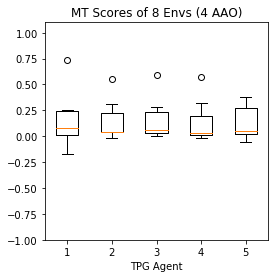

In [3]:
df = pd.read_csv('8-all-at-once-window-4-2.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==150]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(3,11):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())

plt.figure(figsize=(4,4))
plt.boxplot(scoreDists)
plt.ylim(-1,1.1)
plt.title('MT Scores of 8 Envs (4 AAO)')
plt.xlabel('TPG Agent')
#plt.ylabel('Score')
plt.show()

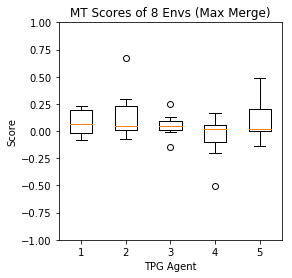

In [33]:
df = pd.read_csv('8-merge.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==100]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(3,11):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())

plt.figure(figsize=(4,4))
plt.boxplot(scoreDists)
plt.ylim(-1,1)
plt.title('MT Scores of 8 Envs (Max Merge)')
plt.xlabel('TPG Agent')
plt.ylabel('Score')
plt.show()

In [18]:
agentsScores = []
for i in range(len(df)):
    print('Agent #' + str(i+1) + ':')
    agentsScores.append([])
    for j in range(3,11):
        agentsScores[-1].append((str(df.columns[j][5:]), 
                (df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
                (soloTpgScores[df.columns[j][5:]] - soloRandomScores[df.columns[j][5:]])))
        print(agentsScores[-1][-1][0] + ': ' + str(agentsScores[-1][-1][1]))
        
    print('\nSorted:')
    agentsScores[-1].sort(key=lambda x: x[1], reverse=True)
    for score in agentsScores[-1]:
        print(score[0] + ': ' + str(score[1]))
    print('\n')

Agent #1:
Alien-v0: -0.010563270885761334
Asteroids-v0: -0.08319541977904013
Atlantis-v0: 0.19007191516053273
BankHeist-v0: 0.0029013539651837525
BattleZone-v0: 0.23444577474085773
Bowling-v0: 0.21277641277641277
Boxing-v0: -0.04993252361673415
Centipede-v0: 0.12422004799704636

Sorted:
BattleZone-v0: 0.23444577474085773
Bowling-v0: 0.21277641277641277
Atlantis-v0: 0.19007191516053273
Centipede-v0: 0.12422004799704636
BankHeist-v0: 0.0029013539651837525
Alien-v0: -0.010563270885761334
Boxing-v0: -0.04993252361673415
Asteroids-v0: -0.08319541977904013


Agent #2:
Alien-v0: 0.01460216857737596
Asteroids-v0: 0.673167240685244
Atlantis-v0: 0.055869181509197265
BankHeist-v0: -0.006769825918762089
BattleZone-v0: 0.29135008899834747
Bowling-v0: 0.21523341523341522
Boxing-v0: -0.07017543859649122
Centipede-v0: 0.03576087625376901

Sorted:
Asteroids-v0: 0.673167240685244
BattleZone-v0: 0.29135008899834747
Bowling-v0: 0.21523341523341522
Atlantis-v0: 0.055869181509197265
Centipede-v0: 0.03576087

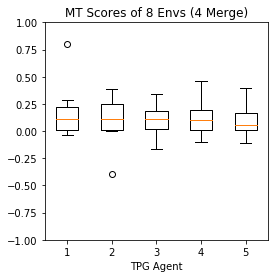

In [38]:
df = pd.read_csv('8-merge-window-4.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==100]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(3,11):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.figure(figsize=(4,4))
plt.boxplot(scoreDists)
plt.ylim(-1,1)
plt.title('MT Scores of 8 Envs (4 Merge)')
plt.xlabel('TPG Agent')
plt.show()

In [39]:
agentsScores = []
for i in range(len(df)):
    print('Agent #' + str(i+1) + ':')
    agentsScores.append([])
    for j in range(3,11):
        agentsScores[-1].append((str(df.columns[j][5:]), 
                (df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
                (soloTpgScores[df.columns[j][5:]] - soloRandomScores[df.columns[j][5:]])))
        print(agentsScores[-1][-1][0] + ': ' + str(agentsScores[-1][-1][1]))
        
    print('\nSorted:')
    agentsScores[-1].sort(key=lambda x: x[1], reverse=True)
    for score in agentsScores[-1]:
        print(score[0] + ': ' + str(score[1]))
    print('\n')

Agent #1:
Alien-v0: 0.006524373194146706
Asteroids-v0: 0.7984076575569173
Atlantis-v0: 0.2017417180867358
BankHeist-v0: 0.006769825918762089
BattleZone-v0: 0.09559924795258277
Bowling-v0: 0.2855036855036855
Boxing-v0: -0.037786774628879895
Centipede-v0: 0.12931204233585628

Sorted:
Asteroids-v0: 0.7984076575569173
Bowling-v0: 0.2855036855036855
Atlantis-v0: 0.2017417180867358
Centipede-v0: 0.12931204233585628
BattleZone-v0: 0.09559924795258277
BankHeist-v0: 0.006769825918762089
Alien-v0: 0.006524373194146706
Boxing-v0: -0.037786774628879895


Agent #2:
Alien-v0: 0.011806008637027372
Asteroids-v0: 0.24734982332155478
Atlantis-v0: 0.2565897918398903
BankHeist-v0: -0.0009671179883945841
BattleZone-v0: 0.09787542052288235
Bowling-v0: 0.3877149877149877
Boxing-v0: -0.3967611336032389
Centipede-v0: 0.13351486062396162

Sorted:
Bowling-v0: 0.3877149877149877
Atlantis-v0: 0.2565897918398903
Asteroids-v0: 0.24734982332155478
Centipede-v0: 0.13351486062396162
BattleZone-v0: 0.09787542052288235
A

In [44]:
df1 = pd.read_csv('8-all-at-once.txt')
df1 = df1[df1.tpgGen==150]

df2 = pd.read_csv('8-all-at-once-window-4.txt')
df2 = df2[df2.tpgGen==150]

df3 = pd.read_csv('8-merge.txt')
df3 = df3[df3.tpgGen==100]

df4 = pd.read_csv('8-merge-window-4.txt')
df4 = df4[df4.tpgGen==150]

dist1 = []
dist2 = []
dist3 = []
dist4 = []

for i in range(len(dfv)):
    for j in range(3,11):
        dist1.append((df1.iloc[i,j] - soloRandomScores[df1.columns[j][5:]]) /
                (soloTpgScores[df1.columns[j][5:]] - soloRandomScores[df1.columns[j][5:]]))
        dist2.append((df2.iloc[i,j] - soloRandomScores[df1.columns[j][5:]]) /
                (soloTpgScores[df1.columns[j][5:]] - soloRandomScores[df1.columns[j][5:]]))
        dist3.append((df3.iloc[i,j] - soloRandomScores[df1.columns[j][5:]]) /
                (soloTpgScores[df1.columns[j][5:]] - soloRandomScores[df1.columns[j][5:]]))
        dist4.append((df4.iloc[i,j] - soloRandomScores[df1.columns[j][5:]]) /
                (soloTpgScores[df1.columns[j][5:]] - soloRandomScores[df1.columns[j][5:]]))
        
print('aao max vs aao 4')
print(stats.ks_2samp(dist1, dist2)) 
print()
print('aao max vs merge max')
print(stats.ks_2samp(dist1, dist3))  
print()
print('aao max vs merge 4')
print(stats.ks_2samp(dist1, dist4))  
print()
print('aao 4 vs merge max')
print(stats.ks_2samp(dist2, dist3)) 
print()
print('aao 4 vs merge 4')
print(stats.ks_2samp(dist2, dist4)) 
print()
print('merge max vs merge 4')
print(stats.ks_2samp(dist3, dist4))

aao max vs aao 4
Ks_2sampResult(statistic=0.25000000000000006, pvalue=0.13925223393980926)

aao max vs merge max
Ks_2sampResult(statistic=0.275, pvalue=0.0796039319616463)

aao max vs merge 4
Ks_2sampResult(statistic=0.20000000000000007, pvalue=0.36131292028978895)

aao 4 vs merge max
Ks_2sampResult(statistic=0.32500000000000007, pvalue=0.022159625126756764)

aao 4 vs merge 4
Ks_2sampResult(statistic=0.2, pvalue=0.36131292028978945)

merge max vs merge 4
Ks_2sampResult(statistic=0.2749999999999999, pvalue=0.07960393196164647)


In [42]:
df.head()

,tpgGen,hoursElapsed,teamId,scoreAlien-v0,scoreAsteroids-v0,scoreAtlantis-v0,scoreBankHeist-v0,scoreBattleZone-v0,scoreBowling-v0,scoreBoxing-v0,scoreCentipede-v0,visAlien-v0,visAsteroids-v0,visAtlantis-v0,visBankHeist-v0,visBattleZone-v0,visBowling-v0,visBoxing-v0,visCentipede-v0,visTotal
10,150,77.838981,30010,244.0,1533.0,38660.0,30.0,15100.0,82.0,-6.0,5168.7,0.018393,0.039286,0.018512,0.029075,0.027440,0.018393,0.018393,0.029225,0.070149
11,150,77.838982,31230,244.0,1603.0,38840.0,37.0,18000.0,81.0,-6.4,7632.6,0.016905,0.039613,0.034494,0.030825,0.022619,0.016905,0.016905,0.029825,0.075208
12,150,77.838983,31845,222.0,1752.0,23940.0,21.0,18900.0,89.9,-9.5,8784.4,0.016964,0.033512,0.034137,0.029400,0.022232,0.016964,0.016964,0.019275,0.071756
13,150,77.838985,36589,228.0,1779.0,32950.0,40.0,19600.0,77.3,-4.8,7948.1,0.017292,0.037411,0.020446,0.031275,0.032857,0.017292,0.018423,0.025650,0.068690
14,150,77.838986,32729,231.0,1425.0,30970.0,36.0,16500.0,78.0,-7.8,8636.0,0.020327,0.048006,0.020685,0.032400,0.033929,0.020208,0.020327,0.023325,0.079732
